# Feature importance plot

In [1]:
# 1. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('features_del.csv')
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       356
         1.0       1.00      0.93      0.96       444

    accuracy                           0.96       800
   macro avg       0.96      0.97      0.96       800
weighted avg       0.96      0.96      0.96       800

ROC-AUC: 0.9911238485676688
PR-AUC: 0.9947288796102474


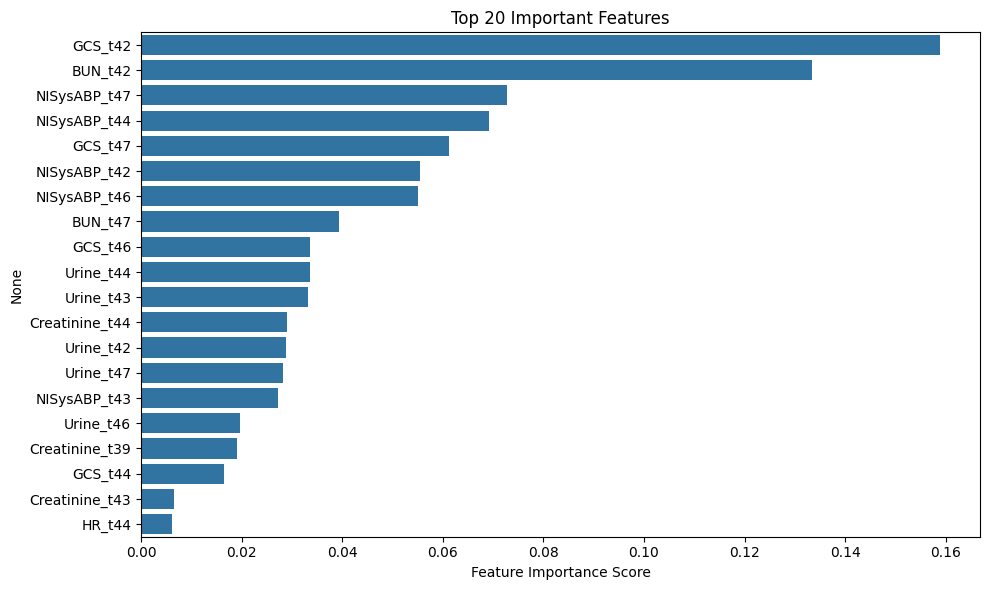

In [18]:

# Convert to DataFrame
# df_feat = pd.DataFrame(X_all, columns=dynamic_cols)

# 6. Feature Importance Plot
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()